Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

goal:predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

# Importing libraries/Loading the dataset

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")


Use case:Loyal or not loyal customers
    We have to find the characteristic of  the churner.
    Univariant Analsys:Target variable(with single col)
    

In [39]:
telcom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
# Check columns types
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data visulization

In [41]:
telcom.shape

(7043, 21)

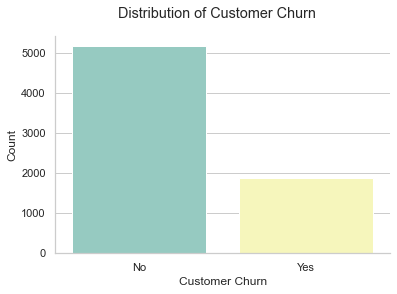

In [42]:
#Looking at Distribution of the target variable(Univariant Analsys)
from matplotlib.pyplot import suptitle
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=telcom)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

# Data cleaning

In [43]:
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [44]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [45]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
#Replacing Empty Space with Nan
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    telcom[i]=telcom[i].replace(" ",np.nan)

In [47]:

telcom.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [49]:
telcom.TotalCharges.isnull().sum()

11

Feature 'TotalCharges' has 11 NaNs or missing values.So lets drop those missing values

In [54]:
# Find out the nan columns
telcom.loc[telcom["TotalCharges"].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [56]:
#Since the % of these records compared to total dataset is very low ie.0.15%,it is safe to ignore them for futher processing.
telcom=telcom.dropna()

In [12]:
#Viewing unique label/data types in each column
for item in telcom.columns:
    print(item)
    print (telcom[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

In [13]:
#Encoding all categorical variables
#replace values in columns with binary features

binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

for i in binary_cols:
    telcom[i]=telcom[i].replace({"Yes":1,"No":0})

#Encoding column 'gender'
telcom['gender']=telcom['gender'].replace({"Male":1,"Female":0})

In [14]:
#Getting Dummy Variables for other Categorical Features
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(telcom[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    telcom.drop(cc, axis=1, inplace=True)
    telcom = telcom.join(dummies)

In [15]:
telcom.drop('customerID',axis=1,inplace=True)

In [16]:
telcom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [17]:
#Converting the target variable into numeric (Yes:1, No:0)
telcom['Churn']=telcom['Churn'].replace({"Yes":1,"No":0})

In [18]:
telcom['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

# correlation 

Univariant Analsys

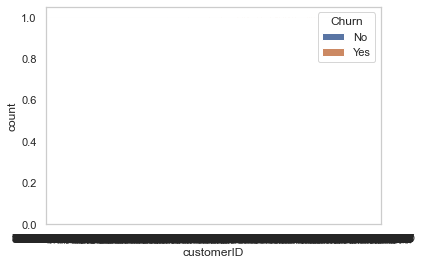

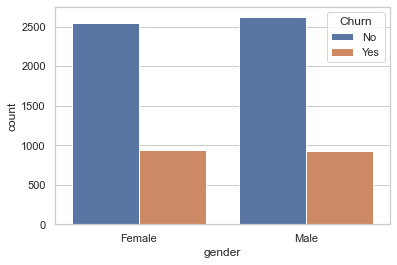

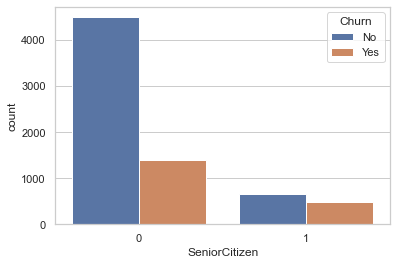

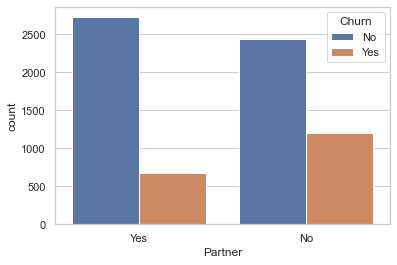

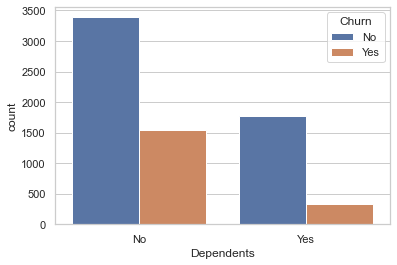

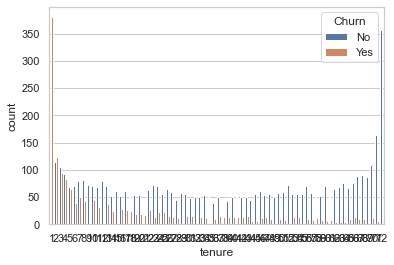

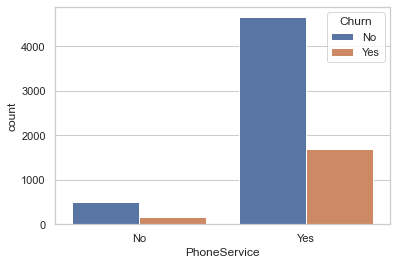

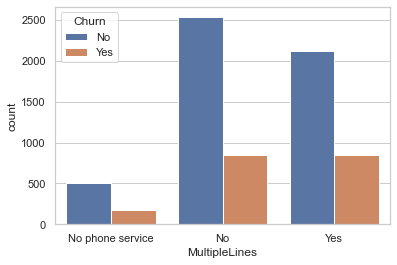

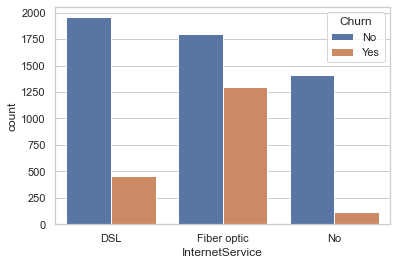

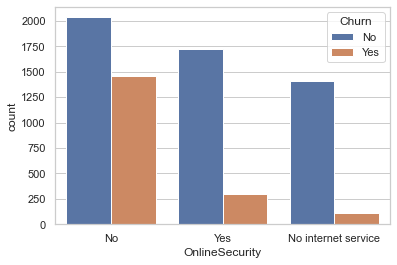

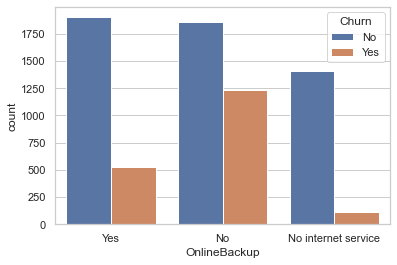

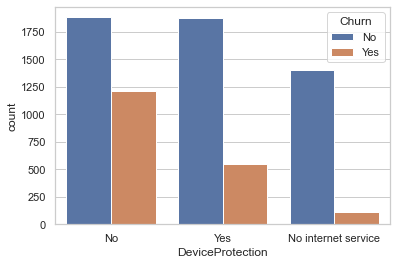

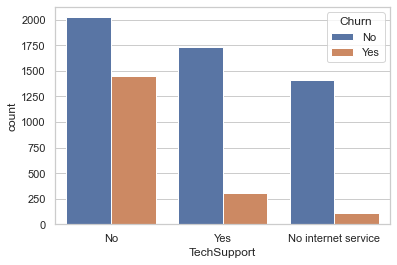

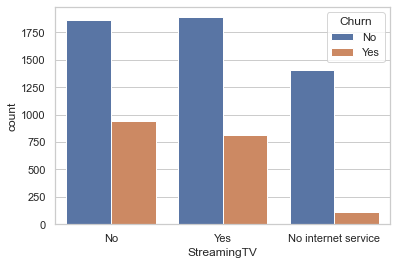

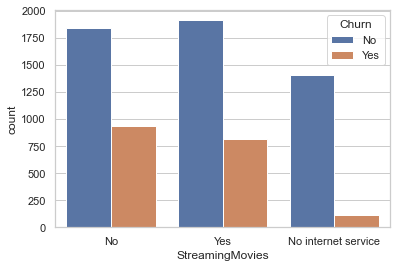

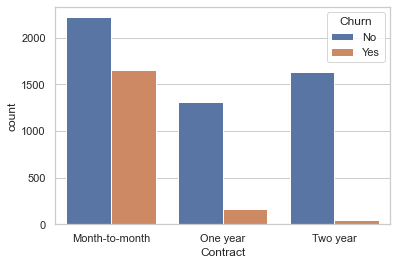

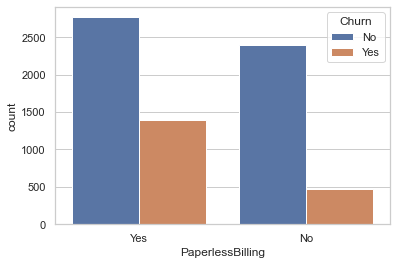

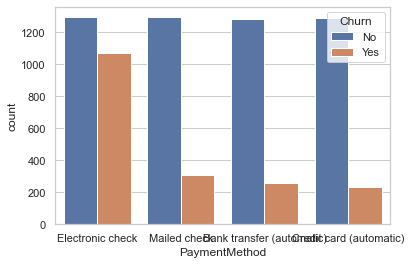

In [61]:
for i, predictor in enumerate(telcom.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telcom, x=predictor, hue='Churn')

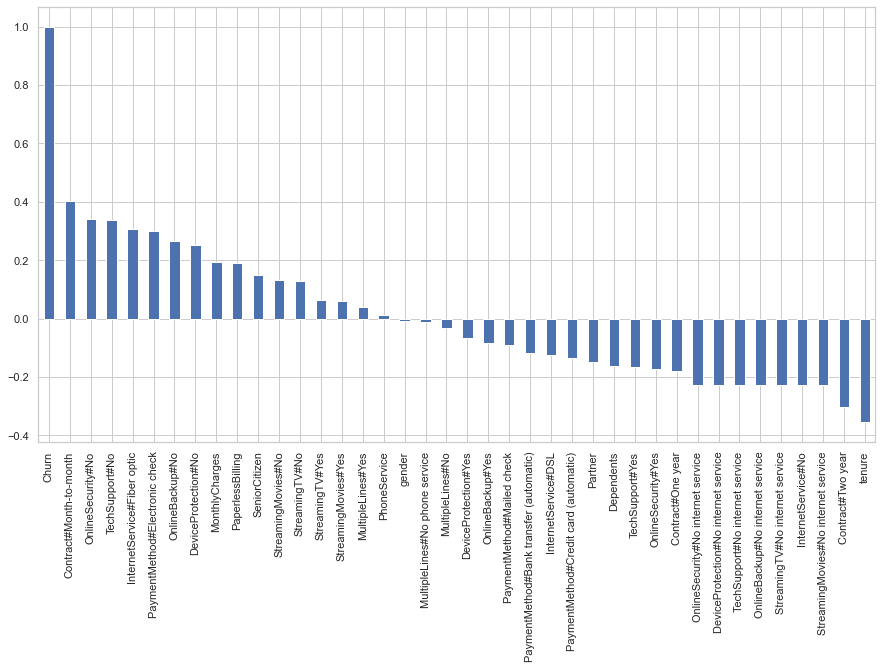

In [19]:
plt.figure(figsize=(15,8))
telcom.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

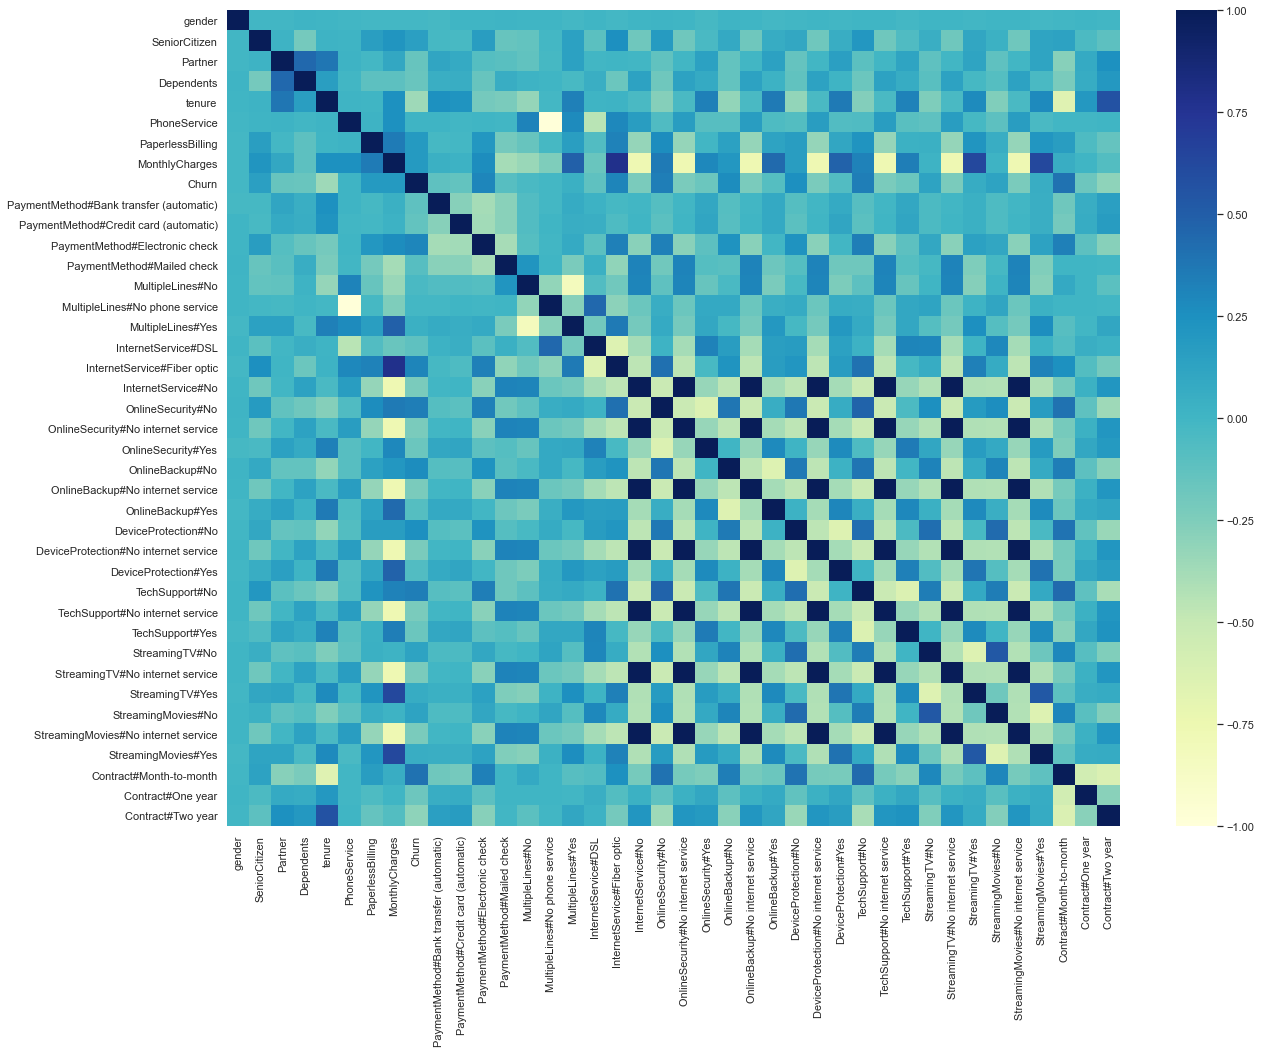

In [20]:
#Examination of correlation Features with each other
corr=telcom.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

The 'No Internet service' in various categorical variables seem to be strongly correlated with each other.Their coorelation with the target variable is on the lower side.So I won;t worry right now about their effect the model.I can did into it deeper once I have a final model.

# Splitting Dataset

In [21]:
from sklearn.model_selection import train_test_split
x = telcom.loc[:, telcom.columns != 'Churn']
y = telcom.loc[:, telcom.columns == 'Churn']
print('Shape of x: {}'.format(x.shape))
print('Shape of y: {}'.format(y.shape))

Shape of x: (7032, 40)
Shape of y: (7032, 1)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (4922, 40)
Number transactions y_train dataset:  (4922, 1)
Number transactions x_test dataset:  (2110, 40)
Number transactions y_test dataset:  (2110, 1)


In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [25]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 80.80%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.847016     0.670046  0.808005     0.758531      0.799771
recall        0.900776     0.553272  0.808005     0.727024      0.808005
f1-score      0.873069     0.606086  0.808005     0.739578      0.801794
support    3608.000000  1314.000000  0.808005  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3250  358]
 [ 587  727]]

Test Result:
Accuracy Score: 79.81%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.842329    0.639913  0.798104     0.741121      0.789087
recall        0.893248    0.531532  0.798104     0.712390      0.798104
f1-score      0.867041    0.580709  0.798104     0.723875      0.791726
support    1555.000000  555.000000  

In [26]:
test_score = accuracy_score(y_test, lr_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,80.800488,79.810427


# K-nearest neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

print_score(knn_clf, x_train, y_train, x_test, y_test, train=True)
print_score(knn_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 83.26%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.855828     0.742574  0.832588     0.799201      0.825593
recall        0.927938     0.570776  0.832588     0.749357      0.832588
f1-score      0.890426     0.645439  0.832588     0.767932      0.825023
support    3608.000000  1314.000000  0.832588  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3348  260]
 [ 564  750]]

Test Result:
Accuracy Score: 76.78%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.817910    0.574713  0.767773     0.696312      0.753941
recall        0.881029    0.450450  0.767773     0.665740      0.767773
f1-score      0.848297    0.505051  0.767773     0.676674      0.758012
support    1555.000000  555.000000  

In [28]:
test_score = accuracy_score(y_test, knn_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,80.800488,79.810427
1,K-nearest neighbors,83.258838,76.777251


# Support Vector machine

In [29]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

print_score(svm_clf, x_train, y_train, x_test, y_test, train=True)
print_score(svm_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.20%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.970955     0.974960  0.971963     0.972958      0.972024
recall        0.991408     0.918569  0.971963     0.954989      0.971963
f1-score      0.981075     0.945925  0.971963     0.963500      0.971691
support    3608.000000  1314.000000  0.971963  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3577   31]
 [ 107 1207]]

Test Result:
Accuracy Score: 76.30%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.766818    0.706767  0.763033     0.736793      0.751023
recall        0.974920    0.169369  0.763033     0.572144      0.763033
f1-score      0.858437    0.273256  0.763033     0.565846      0.704515
support    1555.000000  555.000000  

In [30]:
test_score = accuracy_score(y_test, svm_clf.predict(x_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,80.800488,79.810427
1,K-nearest neighbors,83.258838,76.777251
2,Support Vector Machine,97.196262,76.303318


In [63]:
#Using SMOTEENN Analys for the unbalnced data(up/down sampling)
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_resampled,y_resampled=sm.fit_sample(x,y)

In [64]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=0)

In [65]:
svm_clf_smote = SVC(kernel='rbf', gamma=0.1, C=1.0)

In [66]:
svm_clf_smote.fit(xr_train, yr_train)

SVC(gamma=0.1)

In [68]:
y_pred_smote=svm_clf_smote.predict(xr_test)

In [69]:
print(classification_report(yr_test,y_pred_smote,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       792
           1       0.98      0.86      0.92       980

    accuracy                           0.92      1772
   macro avg       0.92      0.92      0.92      1772
weighted avg       0.93      0.92      0.92      1772



In [ ]:
So, the data is balanced

In [70]:
#Saving a model
import pickle

In [71]:
filename='model.sav'

In [73]:
pickle.dump(svm_clf_smote,open(filename,'wb'))

In [74]:
load_model=pickle.load(open(filename,'rb'))

In [75]:
load_model.score(xr_test,yr_test)

0.9159142212189616

### Predictions

In [31]:
x2 = {'gender' : [1, 0, 0], 'SeniorCitizen': [1, 0, 0], 'Partner' :[1, 0, 0], 'Dependents' :[0, 1, 1], 'tenure':[5, 68, 15],
       'PhoneService':[1, 0, 1], 'PaperlessBilling':[1, 1, 1], 'MonthlyCharges':[46.78, 89.64, 105.34],
       'TotalCharges':[456, 5649, 3861], 'PaymentMethod#Bank transfer (automatic)':[1, 0, 0],
       'PaymentMethod#Credit card (automatic)':[0, 1, 0],
       'PaymentMethod#Electronic check':[0, 0, 1], 'PaymentMethod#Mailed check':[0, 0, 0],
       'MultipleLines#No':[1, 0, 0], 'MultipleLines#No phone service':[0, 1, 0],
       'MultipleLines#Yes':[0, 0, 1], 'InternetService#DSL':[0, 1, 1],
       'InternetService#Fiber optic':[0, 0, 0], 'InternetService#No':[1, 0, 0],
       'OnlineSecurity#No':[0, 0, 0], 'OnlineSecurity#No internet service':[1, 0, 0],
       'OnlineSecurity#Yes':[0, 1, 1], 'OnlineBackup#No':[0, 0, 0],
       'OnlineBackup#No internet service':[1, 0, 0], 'OnlineBackup#Yes':[0, 1, 1],
       'DeviceProtection#No':[0, 0, 0], 'DeviceProtection#No internet service':[1, 0, 0],
       'DeviceProtection#Yes' :[0, 1, 1], 'TechSupport#No':[0, 0, 0],
       'TechSupport#No internet service':[1, 0, 0], 'TechSupport#Yes':[0, 1, 1], 'StreamingTV#No':[0, 0, 0],
       'StreamingTV#No internet service':[1, 0, 0], 'StreamingTV#Yes':[0, 1, 1],
       'StreamingMovies#No':[0, 0, 0], 'StreamingMovies#No internet service':[1, 0, 0],
       'StreamingMovies#Yes':[0, 1, 1], 'Contract#Month-to-month':[0, 1, 1], 'Contract#One year':[0, 0, 0],
       'Contract#Two year':[1, 0, 0]}

In [32]:
x3 = pd.DataFrame(x2)
x3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod#Bank transfer (automatic),...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,1,1,1,0,5,1,1,46.78,456,1,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,1,68,0,1,89.64,5649,0,...,1,0,0,1,0,0,1,1,0,0
2,0,0,0,1,15,1,1,105.34,3861,0,...,1,0,0,1,0,0,1,1,0,0


In [33]:
pred2 = lr_clf.predict(x3)
pred2

array([0, 0, 1], dtype=int64)

The above prediction done by logistic regression tells the third observation is most vulnerable to churn.

In [34]:
pred3 = knn_clf.predict(x3)
pred3

array([0, 0, 0], dtype=int64)

The above prediction done by KNN classifier tells none of then is vulnerable to churn.

In [35]:
pred4 = svm_clf.predict(x3)
pred4

array([0, 0, 0], dtype=int64)

The above prediction done by KNN classifier tells none of then is vulnerable to churn.